In [48]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter('ignore')

In [49]:
train = pd.read_csv('C://Users//Anuvrat Shukla//Desktop//competitions//Analytics//ISB _Intagram posts//train1.csv',encoding="ISO-8859-1", parse_dates=[10,11])
train.shape

(16539, 23)

In [50]:
train.head(1)

,numberPosts,Website,urlProfile,username,numberFollowing,descriptionProfile,alias,numberFollowers,urlImgProfile,filename,...,mentions,multipleImage,NoOfImages,isVideo,localization,tags,numberLikes,url,high_influencer,description
0,988,www.sylviemeis.de,https://www.instagram.com/1misssmeis/,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,https://scontent.cdninstagram.com/t51.2885-19/...,18161288_472089323136061_5128727096486526976_n...,...,"['@fraukeludowig_official', '@rtl_exclusiv', '...",0,1,0,NaN,['#exclusivspezial'],10047,https://www.instagram.com/p/BTdS7XgBe4X/?taken...,0,With my lovely colleague @fraukeludowig_offici...


**Removing URL features**

In [51]:
train=train.drop(['Website','urlProfile','urlImgProfile','urlImage','url'], axis = 1)

**Extracting Date Featurees**

In [52]:
for attr in ['year', 'month', 'day', 'week', 'dayofweek']:                                                                     # running loop for extracting new features from date
  train[attr] = getattr(train['Date'].dt, attr)

In [53]:
train.head(2)

,numberPosts,username,numberFollowing,descriptionProfile,alias,numberFollowers,filename,Date,Time,mentions,...,localization,tags,numberLikes,high_influencer,description,year,month,day,week,dayofweek
0,988,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,18161288_472089323136061_5128727096486526976_n...,2017-04-29,2020-12-06,"['@fraukeludowig_official', '@rtl_exclusiv', '...",...,NaN,['#exclusivspezial'],10047,0,With my lovely colleague @fraukeludowig_offici...,2017,4,29,17,5
1,988,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,18161312_678529115665252_1780327406628765696_n...,2017-04-29,2020-12-06,"['@tine', '@rachelzoe', '@lecolook', '@letsdan...",...,NaN,"['#jumpsuit', '#glam', '#ootn']",16781,0,"My look last night, hosting Let's Dance! Style...",2017,4,29,17,5


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   numberPosts         16539 non-null  int64         
 1   username            16335 non-null  object        
 2   numberFollowing     16539 non-null  int64         
 3   descriptionProfile  16148 non-null  object        
 4   alias               16539 non-null  object        
 5   numberFollowers     16539 non-null  int64         
 6   filename            16539 non-null  object        
 7   Date                16539 non-null  datetime64[ns]
 8   Time                16539 non-null  datetime64[ns]
 9   mentions            16539 non-null  object        
 10  multipleImage       16539 non-null  int64         
 11  NoOfImages          16539 non-null  int64         
 12  isVideo             16539 non-null  int64         
 13  localization        6887 non-null   object    

In [55]:
train.nunique()

numberPosts             881
username                957
numberFollowing         631
descriptionProfile      939
alias                   973
numberFollowers         973
filename              16539
Date                    337
Time                      1
mentions               9412
multipleImage             2
NoOfImages               10
isVideo                   1
localization           3332
tags                   6469
numberLikes           12233
high_influencer           2
description           15988
year                      5
month                    12
day                      31
week                     51
dayofweek                 7
dtype: int64

**Engagement Rate**

In [56]:
train['engagement_rate']=100* (train.numberLikes/train.numberFollowers)

# % NaN Values

In [57]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

localization          58.4
descriptionProfile     2.4
description            1.3
username               1.2
engagement_rate        0.0
multipleImage          0.0
numberFollowing        0.0
alias                  0.0
numberFollowers        0.0
filename               0.0
Date                   0.0
Time                   0.0
mentions               0.0
NoOfImages             0.0
dayofweek              0.0
isVideo                0.0
tags                   0.0
numberLikes            0.0
high_influencer        0.0
year                   0.0
month                  0.0
day                    0.0
week                   0.0
numberPosts            0.0
dtype: float64

Dropping 'localization'

In [13]:
train = train.drop(['localization'], axis=1)

**Replacing null values of 'username', 'description' and 'descriptionProfile' with **0****

In [58]:
train[['descriptionProfile','description','username']]=train[['username','descriptionProfile','description']].fillna('0')

**Extracting Length features for Textual Variables**

In [59]:
# Mentions
train['mentions_len'] = train['mentions'].apply(lambda x: len(x))
# Tags
train['tags_len'] = train['tags'].apply(lambda x: len(x))
# Description 
train['description_len'] = train['description'].apply(lambda x: len(x))
# Description Profile
train['description_profile_len'] = train['descriptionProfile'].apply(lambda x: len(x))

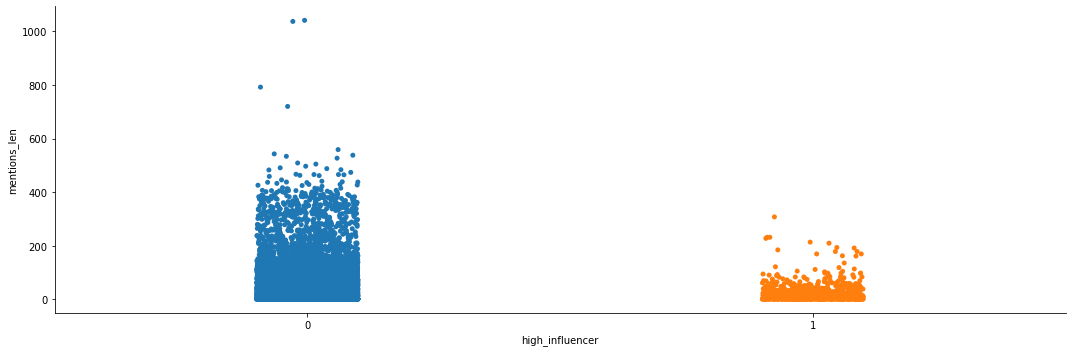

In [60]:
_ = sns.catplot(x="high_influencer", y="mentions_len", data=train, height=5, aspect=24/8)

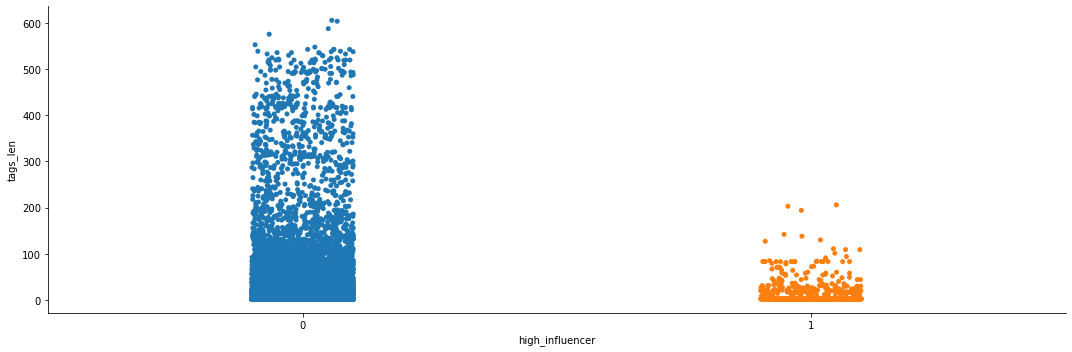

In [61]:
_ = sns.catplot(x="high_influencer", y="tags_len", data=train, height=5, aspect=24/8)

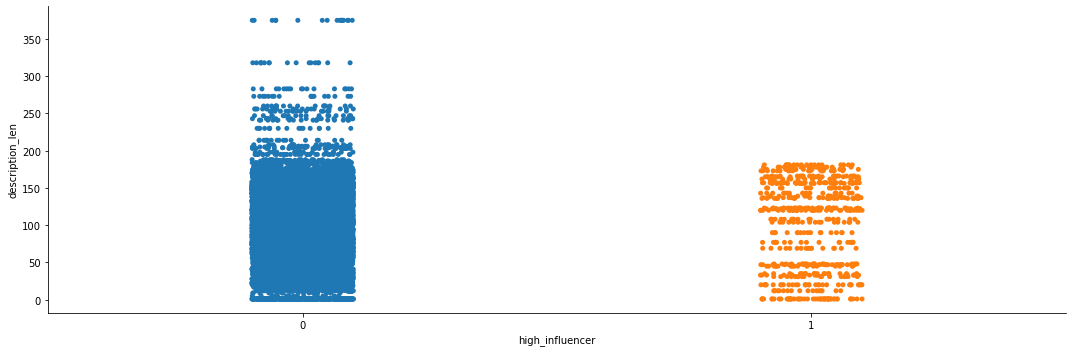

In [62]:
_ = sns.catplot(x="high_influencer", y="description_len", data=train, height=5, aspect=24/8)

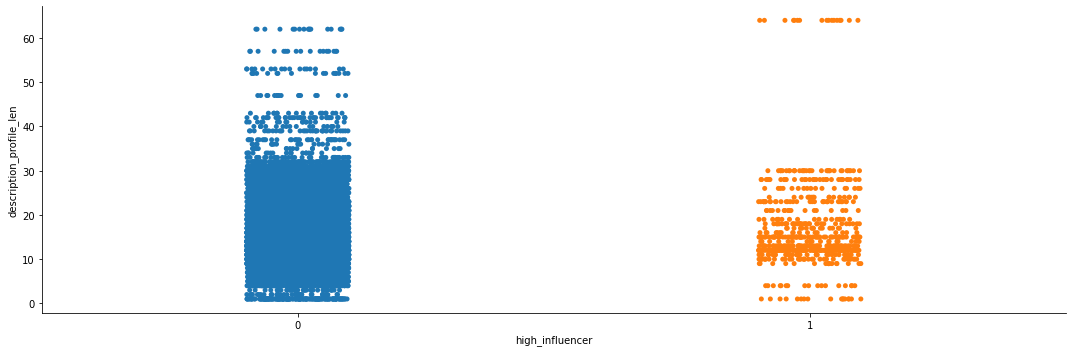

In [63]:
_ = sns.catplot(x="high_influencer", y="description_profile_len", data=train, height=5, aspect=24/8)

In [64]:
train.shape

(16539, 28)

In [65]:
train.reset_index(level=0, inplace=True)
train.head()

,index,numberPosts,username,numberFollowing,descriptionProfile,alias,numberFollowers,filename,Date,Time,...,year,month,day,week,dayofweek,engagement_rate,mentions_len,tags_len,description_len,description_profile_len
0,0,988,With my lovely colleague @fraukeludowig_offici...,233,Sylvie Meis Official Account,1misssmeis,720979,18161288_472089323136061_5128727096486526976_n...,2017-04-29,2020-12-06,...,2017,4,29,17,5,1.393522,124,20,150,28
1,1,988,"My look last night, hosting Let's Dance! Style...",233,Sylvie Meis Official Account,1misssmeis,720979,18161312_678529115665252_1780327406628765696_n...,2017-04-29,2020-12-06,...,2017,4,29,17,5,2.327530,105,31,150,28
2,2,988,Calm before the 'glam' storm! ððð ð»...,233,Sylvie Meis Official Account,1misssmeis,720979,18096206_126240614590026_6106733145975947264_n...,2017-04-27,2020-12-06,...,2017,4,27,17,3,1.557188,48,37,150,28
3,3,988,ð¼Today's look for QVC.. styled by @bydanien...,233,Sylvie Meis Official Account,1misssmeis,720979,18094963_1399253156802062_6673302163394920448_...,2017-04-24,2020-12-06,...,2017,4,24,17,0,2.987466,228,29,150,28
4,4,988,ðHappy Weekend Lovelies â¤ #weekend #yay #...,233,Sylvie Meis Official Account,1misssmeis,720979,18011499_901505923322739_4323762320120479744_n...,2017-04-22,2020-12-06,...,2017,4,22,16,5,2.920196,43,46,150,28


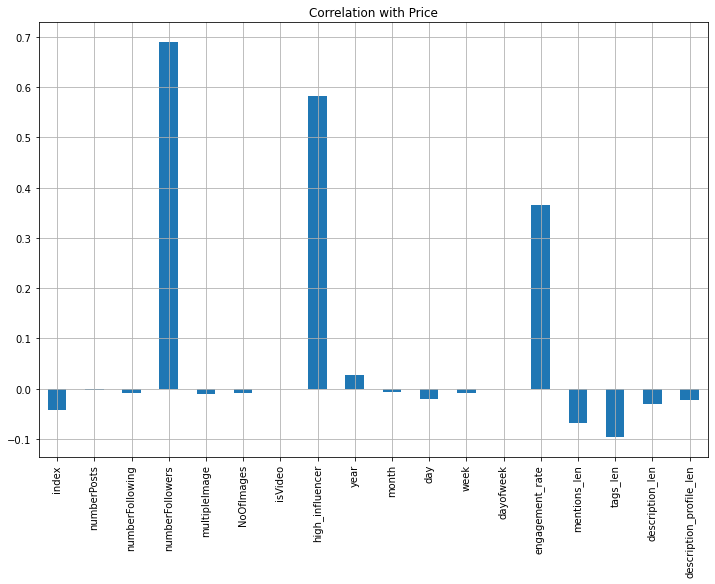

In [66]:
train.drop('numberLikes', axis=1).corrwith(train.numberLikes).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with Price")

# FEATURES

In [67]:
ID_COL, TARGET_COL = 'index', 'numberLikes'

num_cols = ['numberPosts', 'numberFollowing', 'numberFollowers',
            'mentions_len','tags_len','description_len','description_profile_len',
           'year','month','day','week','dayofweek','engagement_rate']
cat_cols = ['isVideo', 'multipleImage','high_influencer']
text_cols = ['username', 'descriptionProfile', 'alias', 'filename','mentions','localization','tags','description']
date_cols = ['Date','Time']

**Log transformed data**

In [68]:
train[num_cols + ['numberLikes']] = train[num_cols + ['numberLikes']].apply(lambda x: np.log1p(x))
#test[num_cols] = test[num_cols].apply(lambda x: np.log1p(x))

train[num_cols].head()

,numberPosts,numberFollowing,numberFollowers,mentions_len,tags_len,description_len,description_profile_len,year,month,day,week,dayofweek,engagement_rate
0,6.896694,5.455321,13.488367,4.828314,3.044522,5.01728,3.367296,7.609862,1.609438,3.401197,2.890372,1.791759,0.872766
1,6.896694,5.455321,13.488367,4.663439,3.465736,5.01728,3.367296,7.609862,1.609438,3.401197,2.890372,1.791759,1.202230
2,6.896694,5.455321,13.488367,3.891820,3.637586,5.01728,3.367296,7.609862,1.609438,3.332205,2.890372,1.386294,0.938908
3,6.896694,5.455321,13.488367,5.433722,3.401197,5.01728,3.367296,7.609862,1.609438,3.218876,2.890372,0.000000,1.383156
4,6.896694,5.455321,13.488367,3.784190,3.850148,5.01728,3.367296,7.609862,1.609438,3.135494,2.833213,1.791759,1.366142


### Helper functions for metrics

In [69]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y_true,y_pred):                                             #returns RMSE
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

def metric(y_true,y_pred):                                           #returns error asked by competition 
    return 1000 * np.sqrt(mean_squared_error(y_true,y_pred))
    
target=train[TARGET_COL]

# # Baseline Model:  Predicting INstagram Likes as mean values

In [70]:
print(target.mean())

9.00161963095354


In [71]:
preds_target= pd.Series([target.mean()] * len(train))

In [72]:
#Predicted
preds_target.head(3)

0    9.00162
1    9.00162
2    9.00162
dtype: float64

In [73]:
#Actual
target.head(3)

0    9.215129
1    9.728062
2    9.326166
Name: numberLikes, dtype: float64

**Metrics**

In [74]:
error         = rmse(target,preds_target)
score_metric  = metric(target,preds_target)

score_metric, error

(1387.6093374115615, 0.14379925353936085)

# Baseline Model2: Predicting using number of posts

Mean Likes per post

In [75]:
((train['numberLikes'] + 1)/(train['numberPosts'] + 1)).mean() 

1.2274703200286619

**Metrics**

In [76]:
preds_target=train['numberPosts'] * 1.227
metric_score=metric(target,preds_target)
error         = rmse(target,preds_target)
metric_score,error

(1850.0924018788558, 0.19205714726364576)

# **ML Models** - **IMPORT DATA AGAIN / MANIPULATE **

**Log transformed data**

In [77]:
train[num_cols + ['numberLikes']] = train[num_cols + ['numberLikes']].apply(lambda x: np.log1p(x))

In [78]:
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in text_cols + date_cols]

len(features), len(cat_num_cols)

(27, 17)

**Split the data set into train (80 %) and validation sets (20%)** 

In [79]:
trn, val = train_test_split(train, test_size=0.2, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
#X_test = test_proc[features]

**Fit a regression Model on train, check its results on validation set.**

In [80]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [81]:
def metric(y_true,y_pred):
    return 1000*np.sqrt(mean_squared_error(y_true,y_pred))

**Linear Regression** - Only NUMERICAL Features

In [82]:
clf = LinearRegression()
_=clf.fit(X_trn[num_cols],y_trn)

In [83]:
preds_val=clf.predict(X_val[num_cols])

In [85]:
#RESULT
metric(y_val,preds_val)

57.211164633294096

**57**

**Linear Regression** - Categorical + Numerical Features

In [86]:
clf=LinearRegression()
_ = clf.fit(X_trn[cat_num_cols],y_trn)

In [87]:
preds_val=clf.predict(X_val[cat_num_cols])

In [88]:
#Result
metric(y_val,preds_val)

57.2086719363556

**57**

#  Decision Tree Regressor - Hyper Parameter Tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
}


In [97]:
clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=1,
                         n_iter=20)

In [98]:
search = clf.fit(train[cat_num_cols], train[TARGET_COL])
search.best_params_

{'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

In [104]:
best_params = {'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

clf = DecisionTreeRegressor(**best_params)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

#RESULT
metric(y_val, preds_val)

18.560094735770825

**19**

# Validation Strategy

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [106]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5         #Divide in 5 split (K)

  oofs = np.zeros(len(train))             #train prediction
  preds = np.zeros((len(test)))           #test prediction

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop') #splitting target in 10 parts 

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]



    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

**KFold on Decision Tree**

In [107]:
dt_params = {'min_samples_split': 30,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 4}
clf = DecisionTreeRegressor(**dt_params)


In [108]:
dt_oofs, dt_preds = run_clf_kfold(clf, trn, val, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 77.06791678404718

------------- Fold 2 -------------

AV metric score for validation set is 57.87401521656451

------------- Fold 3 -------------

AV metric score for validation set is 73.19670437455429

------------- Fold 4 -------------

AV metric score for validation set is 58.67676541130402

------------- Fold 5 -------------

AV metric score for validation set is 65.37399295284932


AV metric for oofs is 66.87884422160535


**66**

# **Gradient Boosting**

## **LightGBM**

In [109]:
from lightgbm import LGBMRegressor

In [110]:
clf = LGBMRegressor()
lgb_oofs, lgb_preds = run_clf_kfold(clf, trn, val, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 54.89155451058448

------------- Fold 2 -------------

AV metric score for validation set is 12.362951568879323

------------- Fold 3 -------------

AV metric score for validation set is 10.117573357134999

------------- Fold 4 -------------

AV metric score for validation set is 11.523772659097297

------------- Fold 5 -------------

AV metric score for validation set is 9.612069390659629


AV metric for oofs is 26.436166290328035


**26**

### **Tuning LightGBM**

* Early Stopping: Stopping the model training, when the model starts to overfit
  * How do we know if model is overfitting ?
* HyperParameter Optimization.
  * Is random search the best way to go ?

**Simple Function to Run Gradient Boosting**

In [111]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]
 
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi

**Manual Tuning. Choosing Hyperparameters to Tune**


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0563302
[200]	valid_0's rmse: 0.0557733
[300]	valid_0's rmse: 0.0557778
Early stopping, best iteration is:
[206]	valid_0's rmse: 0.0557624

AV metric score for validation set is 55.7623559489272

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0106613
[200]	valid_0's rmse: 0.0103814
[300]	valid_0's rmse: 0.0101939
[400]	valid_0's rmse: 0.010036
[500]	valid_0's rmse: 0.0097566
[600]	valid_0's rmse: 0.00958976
[700]	valid_0's rmse: 0.00948078
[800]	valid_0's rmse: 0.0095207
[900]	valid_0's rmse: 0.00942835
Early stopping, best iteration is:
[848]	valid_0's rmse: 0.00938403

AV metric score for validation set is 9.384026882717686

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.00999917
[200]	valid_0's rmse: 0.0102714
Early s

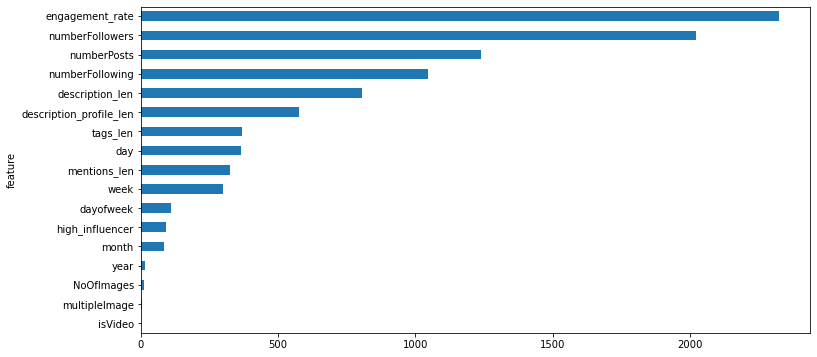

In [112]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**26.4**

**Tuning Learning Rate**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.0591475
[600]	valid_0's rmse: 0.0560802
[900]	valid_0's rmse: 0.0558184
Early stopping, best iteration is:
[812]	valid_0's rmse: 0.0558033

AV metric score for validation set is 55.803276377789985

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.0165308
[600]	valid_0's rmse: 0.0110056
[900]	valid_0's rmse: 0.0107666
[1200]	valid_0's rmse: 0.0104589
[1500]	valid_0's rmse: 0.0103046
[1800]	valid_0's rmse: 0.0100593
[2100]	valid_0's rmse: 0.00992567
[2400]	valid_0's rmse: 0.00989128
[2700]	valid_0's rmse: 0.00980079
[3000]	valid_0's rmse: 0.0096542
[3300]	valid_0's rmse: 0.00956931
[3600]	valid_0's rmse: 0.0095298
[3900]	valid_0's rmse: 0.00945946
[4200]	valid_0's rmse: 0.00941657
[4500]	valid_0's rmse: 0.00937536
Early stopping, best iteration is:
[4466]	valid_0's rmse: 0.00937281

AV metric scor

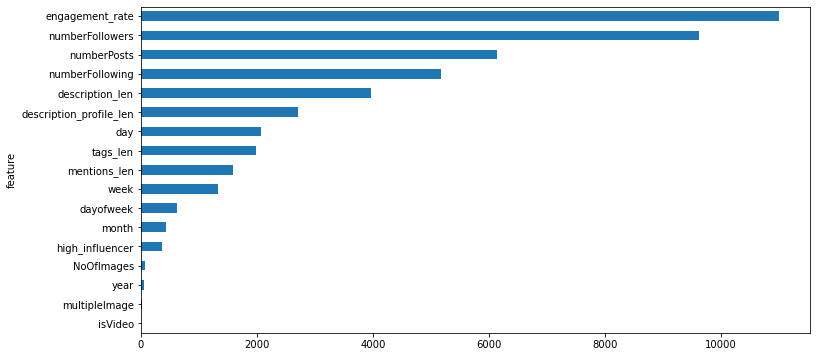

In [113]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**26.56**

## **CatBoost**


------------- Fold 1 -------------
0:	learn: 0.1370928	test: 0.1528949	best: 0.1528949 (0)	total: 173ms	remaining: 8m 39s
200:	learn: 0.0379305	test: 0.0720951	best: 0.0720951 (200)	total: 1.04s	remaining: 14.5s
400:	learn: 0.0150673	test: 0.0592228	best: 0.0592228 (400)	total: 1.77s	remaining: 11.5s
600:	learn: 0.0089486	test: 0.0565673	best: 0.0565673 (600)	total: 2.49s	remaining: 9.94s
800:	learn: 0.0066490	test: 0.0558244	best: 0.0558244 (800)	total: 3.24s	remaining: 8.9s
1000:	learn: 0.0054792	test: 0.0555774	best: 0.0555774 (1000)	total: 4s	remaining: 7.99s
1200:	learn: 0.0047806	test: 0.0554356	best: 0.0554356 (1200)	total: 4.91s	remaining: 7.36s
1400:	learn: 0.0043237	test: 0.0553592	best: 0.0553592 (1400)	total: 6.25s	remaining: 7.13s
1600:	learn: 0.0040015	test: 0.0553143	best: 0.0553143 (1600)	total: 6.94s	remaining: 6.07s
1800:	learn: 0.0037654	test: 0.0552929	best: 0.0552888 (1795)	total: 7.87s	remaining: 5.24s
2000:	learn: 0.0035782	test: 0.0552729	best: 0.0552728 (1997)

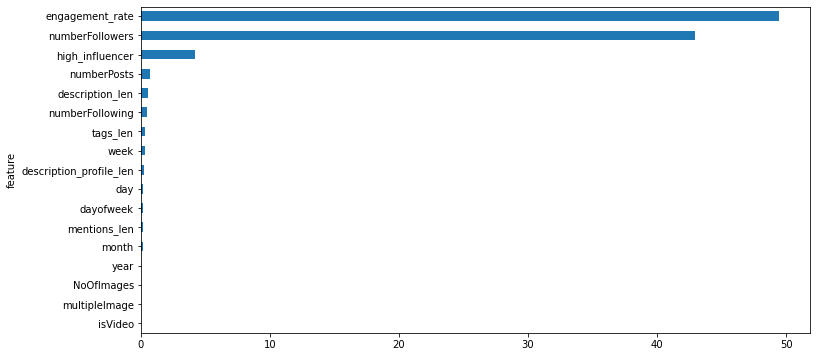

In [114]:
clf = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**26.4**

## XGBoost


------------- Fold 1 -------------
[0]	validation_0-rmse:1.70734
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.05253
[400]	validation_0-rmse:0.05147
[600]	validation_0-rmse:0.05122
[800]	validation_0-rmse:0.05113
[999]	validation_0-rmse:0.05107

AV metric score for validation set is 51.07036692167877

------------- Fold 2 -------------
[0]	validation_0-rmse:1.70756
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.00800
[400]	validation_0-rmse:0.00595
[600]	validation_0-rmse:0.00529
[800]	validation_0-rmse:0.00503
[999]	validation_0-rmse:0.00488

AV metric score for validation set is 4.883839486104545

------------- Fold 3 -------------
[0]	validation_0-rmse:1.70921
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.00816
[400]	validation_0-rmse:0.00624
[600]	validation_0-rmse:0.00566
[800]	validation_0-rmse:0.00540
[999]	validation_0-rmse:0.00524

AV metric

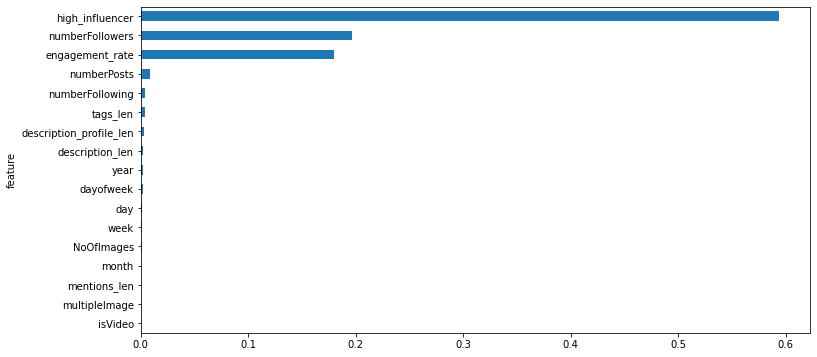

In [115]:
clf = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, trn, val, cat_num_cols)

**23.34**